# CLASSIFICATION MODELS

In [1]:
##Support Vector Machine for classification a Bot or Not!!!

In [2]:
import pandas as pd #importing the pandas package

In [3]:
import numpy as np #importing the numpy package

In [4]:
import matplotlib.pyplot as plt #importing the matplotlib package

In [5]:
import seaborn as sb #importing the seaborn package

In [6]:
%matplotlib inline

In [7]:
data = pd.read_csv("C:/Users/tanuj/Desktop/Subjects/DSP/Project_NEW/output.csv",encoding="ISO-8859-1") #reading the dataset

In [8]:
data.head()

,id,created_at,user_screen_name,user_followers_count,user_location,user_verified,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_geo_enabled,Hashtags,text,Sentiment,SentimentClass,Bot_or_NoBot
0,9.900000e+17,29-04-18 3:26,amith97ba,270,"Bangalore, India",False,760,2,9417,11619,False,[],@airtelindia All your problems to watch Ipl ma...,0.0,Neutral,Bot
1,9.900000e+17,29-04-18 3:23,ZackREX3,7,"New Delhi, India",False,33,0,1203,380,False,"[{'indices': [16, 24], 'text': 'iphone8'}, {'i...",@geekyranjit Is #iphone8 or samsung #s8 worth ...,0.3,Positive,NoBot
2,9.900000e+17,29-04-18 3:17,daichi1SOL,471,NaN,False,442,1,2091,1199,True,[],RT @daichi1SOL: iPhone8ð±â¦ï¸coolððð,0.0,Neutral,NoBot
3,9.900000e+17,29-04-18 3:17,ayarie1003,264,NaN,False,251,2,2479,1039,False,[],@M1jgHuCuFqpzt2S iPhone8,0.0,Neutral,NoBot
4,9.900000e+17,29-04-18 3:15,9_arashi_11,1108,NaN,False,250,69,23392,6028,False,[],@aiba___nicchi iPhone8,0.0,Neutral,NoBot


In [9]:
data.shape

(1035, 16)

In [10]:
data.info() #To Find Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 16 columns):
id                       1035 non-null float64
created_at               1035 non-null object
user_screen_name         1035 non-null object
user_followers_count     1035 non-null int64
user_location            802 non-null object
user_verified            1035 non-null bool
user_friends_count       1035 non-null int64
user_listed_count        1035 non-null int64
user_favourites_count    1035 non-null int64
user_statuses_count      1035 non-null int64
user_geo_enabled         1035 non-null bool
Hashtags                 1035 non-null object
text                     1035 non-null object
Sentiment                1035 non-null float64
SentimentClass           1035 non-null object
Bot_or_NoBot             1035 non-null object
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 115.3+ KB


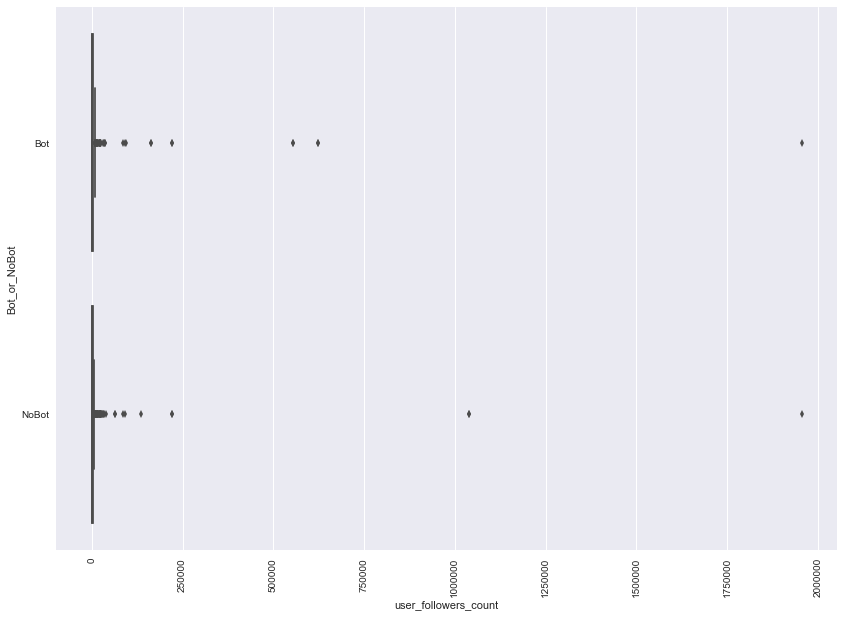

In [11]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sb.boxplot(x='user_followers_count', y='Bot_or_NoBot', data=data)

In [12]:
select_cols = ["user_followers_count","user_verified","user_friends_count","user_listed_count","user_favourites_count","user_statuses_count","user_geo_enabled"]

In [13]:
x = data[select_cols] #Selcting the x Variables

In [14]:
y = data.Bot_or_NoBot #Selecting the Y Varible or Target Variable

In [15]:
from sklearn.model_selection import train_test_split  #Importing the train and test function

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=36) #Splitting the data

In [17]:
from sklearn import svm # To fit the svm classifier


In [18]:
C = 1.0  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='rbf',C=C,cache_size=400,degree=4 )


In [19]:
svc.fit(x_train, y_train) #Fitting the model on train data

SVC(C=1.0, cache_size=400, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred = svc.predict(x_test) #Predict on test data

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [22]:
cm = confusion_matrix(y_test,y_pred)#creating the confusion matrix

In [23]:
cm

array([[ 57,  94],
       [ 11, 149]], dtype=int64)

In [24]:
print(classification_report(y_test,y_pred)) #Printing the classification report

             precision    recall  f1-score   support

        Bot       0.84      0.38      0.52       151
      NoBot       0.61      0.93      0.74       160

avg / total       0.72      0.66      0.63       311



In [25]:
accuracy_score(y_test,y_pred)  #Checking the accuracy of our model

0.662379421221865

Hyper parameter optimization using Grid Search. 
Find the optimal value of 'C' which is to toggle between the hard margin or soft margin classifier.
Adjusting the Kernel and trying to find the best kernel which will work forour model.
Fine tunning the gamma and epsilon value for the data.

#Gamma
Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead

#Epsilon (default = 0.1)
Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfTree = RandomForestClassifier(bootstrap = 'True', criterion= 'gini',max_depth= 4, max_features= 7, min_samples_leaf= 3, min_samples_split= 10)


In [131]:
rfTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=4, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
y_pred = rfTree.predict(x_test)

In [133]:
cm = confusion_matrix(y_test,y_pred)


In [134]:
cm

array([[ 68,  83],
       [ 29, 131]], dtype=int64)

In [135]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        Bot       0.70      0.45      0.55       151
      NoBot       0.61      0.82      0.70       160

avg / total       0.66      0.64      0.63       311



In [136]:
accuracy_score(y_test,y_pred)

0.639871382636656

In [41]:
#Hyper paramater optimization of Random Forest Regressor


In [161]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from time import time

In [111]:
#Refered from below link " http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html"
# use a full grid over all parameters
param_grid = {"max_depth": [3,4,5],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [112]:
# run grid search
grid_search = GridSearchCV(rfTree, param_grid=param_grid)
start = time()
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'max_features': [1, 3, 7], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 72.96 seconds for 324 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.684 (std: 0.021)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.681 (std: 0.018)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.681 (std: 0.016)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 10, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.681 (std: 0.014)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}



In [99]:
from time import time


# Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier 

In [28]:
XGB = GradientBoostingClassifier(max_depth=5,n_estimators=1000,learning_rate=0.01)


In [29]:
XGB.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
y_pred = XGB.predict(x_test) #Predicting the values on test dataset

In [31]:
XBG_cm = confusion_matrix(y_test,y_pred) #calculating the confusion matrix

In [32]:
print(XBG_cm)

[[ 98  53]
 [ 42 118]]


In [33]:
print(classification_report(y_test,y_pred)) #Printing the classification report

             precision    recall  f1-score   support

        Bot       0.70      0.65      0.67       151
      NoBot       0.69      0.74      0.71       160

avg / total       0.69      0.69      0.69       311



In [34]:
accuracy_score(y_test,y_pred) #Calculating the accuracy of model

0.6945337620578779

# NEURAL NETWORK

In [127]:
from sklearn.neural_network import MLPClassifier #Importing the Multi Layer Percepton Model

Below code is refered from below links

https://www.kaggle.com/hhllcks/neural-net-with-gridsearch

http://scikit-neuralnetwork.readthedocs.io/en/latest/guide_sklearn.html


In [149]:
Neural_MLP = MLPClassifier(hidden_layer_sizes=(5,10,15),max_iter=5000,learning_rate_init=0.1,momentum=0.01,solver='adam')

Have hyper parameter optimized the neural network.

Kept the hidden layer sizer incremental increasing as we move to the next layer.

Maximum iterations have kept it 5000 so as the model has enough iterations to learn.

Kept the learning rate and momentum both small as it will reduce the errors.

The method is adam which is a optimization method and is a mix of adaptive gradient descent and Root Mean Square Propogation.

In [150]:
Neural_MLP.fit(x_train,y_train) #Fitting the Model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 10, 15), learning_rate='constant',
       learning_rate_init=0.1, max_iter=5000, momentum=0.01,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [151]:
y_pred = Neural_MLP.predict(x_test) #Predicting on Test DataSet

In [152]:
MLP_NN_cm = confusion_matrix(y_test,y_pred) #Confusion Matrix

In [153]:
MLP_NN_cm

array([[ 52,  99],
       [ 25, 135]], dtype=int64)

In [154]:
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

        Bot       0.68      0.34      0.46       151
      NoBot       0.58      0.84      0.69       160

avg / total       0.62      0.60      0.57       311



In [155]:
accuracy_score(y_test,y_pred) #Calculating the accuracy of model

0.6012861736334405

## ADA BOOST CLASSIFIER

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


## Hyper parameter Optimize the Adaboost decision tree classifier.
Base_estimator = The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. Decision tree classifier which is also hyper parameter optimize to fit the requirements. 

Used Grid Search and hardcoded the parameters. 
Learning_rate = Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

Algorithm = If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

n_estimators = n_estimators : integer, optional (default=50)

The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.


Below line of code is referred from below link.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [120]:
# Create adaboost-decision tree classifer object

ADABOOST = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier( criterion='gini',
            max_depth=4, max_features=None,
            min_samples_leaf=1, min_samples_split=4, random_state=None),
          learning_rate=0.1, n_estimators=1000)

In [121]:
ADABOOST.fit(x_train,y_train) #Fitting the Model

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=1000, random_state=None)

In [122]:
y_pred = ADABOOST.predict(x_test) #Predicting on Test DataSet

In [123]:
ADABOOST_cm = confusion_matrix(y_test,y_pred) #calculating the confusion matrix

In [124]:
print(ADABOOST_cm)

[[ 97  54]
 [ 38 122]]


In [125]:
print(classification_report(y_test,y_pred)) #Printing the classification report

             precision    recall  f1-score   support

        Bot       0.72      0.64      0.68       151
      NoBot       0.69      0.76      0.73       160

avg / total       0.71      0.70      0.70       311



In [126]:
accuracy_score(y_test,y_pred) #Calculating the accuracy of model

0.7041800643086816

# Bag of Words

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve, auc

class twitter_bot(object):
    def __init__(self):
        pass

    def perform_train_test_split(df):
        msk = np.random.rand(len(df)) < 0.75
        train, test = df[msk], df[~msk]
        X_train, y_train = train, train.ix[:,-1]
        X_test, y_test = test, test.ix[:, -1]
        return (X_train, y_train, X_test, y_test)

    def bot_prediction_algorithm(df):
        # creating copy of dataframe
        train_df = df.copy()
        
        # converting id to int
        train_df['id'] = train_df.id.apply(lambda x: int(x))
        train_df['user_followers_count'] = train_df.user_followers_count.apply(lambda x: 0 if x=='None' else int(x))
        train_df['user_friends_count'] = train_df.user_friends_count.apply(lambda x: 0 if x=='None' else int(x))
        train_df['user_verified'] = train_df.user_verified.apply(lambda x: 1 if ((x == True) or x == 'TRUE') else 0)
        
        #We created two bag of words because more bow is stringent on test data, so on all small dataset we check less
       
        bag_of_words_bot = r'bot|problems|win|see|rt|im|good|floral|couple|good|unique|win|airborne|adidas|happy|setup|definitely|cloud|million|iridescent|want|hey|baseball|cult|got|floral|shop|smartphone|item|also|join|pdca|leo|wonderingproblems'
      

        # check if the name contains bot or screenname contains b0t
        condition = train_df.user_screen_name.str.contains(bag_of_words_bot, case=False, na=False)# these all are bots
        predicted_df = train_df[condition]  # these all are bots
        predicted_df.Bot_or_NoBot = 0
        predicted_df = predicted_df[['id', 'Bot_or_NoBot']]

        # check if the user is verified
        verified_df = train_df[~condition]
        condition = (verified_df.user_verified == 1)  # these all are nonbots
        predicted_df1 = verified_df[condition][['id', 'Bot_or_NoBot']]
        predicted_df1.Bot_or_NoBot = 1
        predicted_df = pd.concat([predicted_df, predicted_df1])

        ls_df = verified_df[~condition]

        # check if listed_count>16000
        listed_count_df = ls_df[~condition]
        listed_count_df.user_listed_count = listed_count_df.user_listed_count.apply(lambda x: 0 if x == 'None' else x)
        listed_count_df.user_listed_count = listed_count_df.user_listed_count.apply(lambda x: int(x))
        condition = (listed_count_df.user_listed_count > 15000)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'Bot_or_NoBot']]
        predicted_df1.Bot_or_NoBot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])
        
        #check follower Count
        followers_count_df = ls_df[~condition]
        condition = (followers_count_df.user_followers_count > 1500)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'Bot_or_NoBot']]
        predicted_df1.Bot_or_NoBot = 1
        predicted_df = pd.concat([predicted_df, predicted_df1])
        
         #check statuscount Count
        status_count_df = ls_df[~condition]
        condition = (status_count_df.user_statuses_count > 28000)  # these all are bots
        predicted_df1 = status_count_df[condition][['id', 'Bot_or_NoBot']]
        predicted_df1.Bot_or_NoBot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        #remaining
        predicted_df1 = listed_count_df[~condition][['id', 'Bot_or_NoBot']]
        predicted_df1.Bot_or_NoBot = 1 # these all are nonbots
        predicted_df = pd.concat([predicted_df, predicted_df1])
        return predicted_df

    def get_predicted_and_true_values(features, target):
        y_pred, y_true = twitter_bot.bot_prediction_algorithm(features).Bot_or_NoBot.tolist(), target.tolist()
        return (y_pred, y_true)

    def get_accuracy_score(df):
        (X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = accuracy_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = accuracy_score(y_pred_test, y_true_test)
        return (train_acc, test_acc) 



In [19]:
train_df = pd.read_csv('outputedited.csv')
train_df.head()

,Unnamed: 0,id,created_at,user_screen_name,user_followers_count,user_location,user_verified,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_geo_enabled,Hashtags,text,Sentiment,SentimentClass,Bot_or_NoBot
0,0,9.904320e+17,29-04-18 3:26,amith97ba,270,"Bangalore, India",False,760,2,9417,11619,False,[],@airtelindia All your problems to watch Ipl ma...,0.0,Neutral,0
1,1,9.904310e+17,29-04-18 3:23,ZackREX3,7,"New Delhi, India",False,33,0,1203,380,False,"[{'indices': [16, 24], 'text': 'iphone8'}, {'i...",@geekyranjit Is #iphone8 or samsung #s8 worth ...,0.3,Positive,1
2,2,9.904300e+17,29-04-18 3:17,daichi1SOL,471,NaN,False,442,1,2091,1199,True,[],RT @daichi1SOL: iPhone8📱♦️cool👍👍👍,0.0,Neutral,1
3,3,9.904300e+17,29-04-18 3:17,ayarie1003,264,NaN,False,251,2,2479,1039,False,[],@M1jgHuCuFqpzt2S iPhone8,0.0,Neutral,1
4,4,9.904290e+17,29-04-18 3:15,9_arashi_11,1108,NaN,False,250,69,23392,6028,False,[],@aiba___nicchi iPhone8,0.0,Neutral,1


In [20]:


print("Train Accuracy: ", twitter_bot.get_accuracy_score(train_df)[0])
print("Test Accuracy: ", twitter_bot.get_accuracy_score(train_df)[1])

Train Accuracy:  0.5538922155688623
Test Accuracy:  0.48695652173913045


# Model Comparision

### Model Name                          Accuracy

Support Vector Machine               66.23%
"RBF" Kernel

Random Forest Classifier             63.98%


Gradient Boosting Classifier         69.45%


Neural Network                       60.12%


ADA Boost Classifier                 70.41%


Bag of Words                         48.97%

From the above table we can conclude that all are models are performing better than our base line accuracy.

References:
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object
https://beebom.com/how-to-identify-twitter-bots/
https://www.kdnuggets.com/2015/11/bot-not-data-analysis-python.html/2
https://arxiv.org/ftp/arxiv/papers/1601/1601.05140.pdf
https://medium.com/@justinzcai/using-machine-learning-to-analyze-twitter-for-real-time-influenza-surveillance-585981462eac
https://arxiv.org/pdf/1610.09225.pdf
http://jpdickerson.com/pubs/dickerson14using.pdf
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object
https://paulvanderlaken.com/2018/03/17/identifying-dirty-twitter-bots-with-r-and-python/